In [1]:
import numpy as np
import pandas as pd

from PSLR import PSLR, PSLR_Order
from fun_helpers.data_generate import FunctionalGenerator, ScalarGenerator
from fun_helpers.tools import add_time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

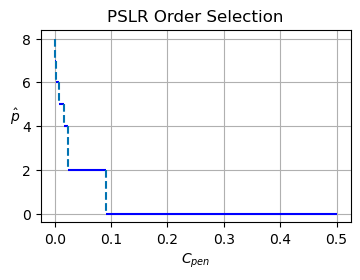

Accuracy: 0.825 F1 score: 0.8108108108108109


In [2]:
random_state = 2025
FG = FunctionalGenerator(seed = random_state)
SG = ScalarGenerator(seed = random_state)

n = 100
d = 2
q = 3

X, y = FG.get_data(n, d)
X = add_time(X)
z = SG.get_data(n, q)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = random_state, stratify= y)
z_train, z_test, _, _ = train_test_split(z, y, test_size= 0.2, random_state = random_state, stratify= y)

OS = PSLR_Order() # PSLR Order Selector
p = OS.select_order_p(8, X_train, y_train, z_train, CpenMax=0.5)
model = PSLR(p)
model.fit(X_train, y_train, z_train)
y_pred = model.predict(X_test, z_test)

ACC = accuracy_score(y_pred,y_test)
F1 = f1_score(y_pred,y_test)

print('Accuracy:', ACC, 'F1 score:', F1)